In [ ]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #A supervised model for classification purpose, multiple decision trees in training phase and combines for final product
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV - used to perform gridSearch to find the best combination of hyperparamaters for best performance on training set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

# New Section

In [ ]:
#Loading the data for the model
df = pd.read_csv("traindata.csv")

In [ ]:
#weatherfeatures needed to train the model
weather_features = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'LATITUDE', 'LONGITUDE', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL', 'DEP_DEL15']
df = df[weather_features]

In [ ]:
print(df)

       PRCP  SNOW  SNWD  TMAX   AWND  LATITUDE  LONGITUDE  DEP_AIRPORT_HIST  \
0      0.00   0.0   0.0  95.0   4.25    35.219    -80.936          0.273236   
1      0.00   0.0   0.0  71.0  11.41    39.774   -104.880          0.121849   
2      0.00   0.0   0.0  54.0   0.45    34.729    -92.234          0.187867   
3      0.00   0.0   0.0  64.0   8.05    32.733   -117.187          0.141446   
4      0.01   0.0   0.0  94.0  10.51    41.978    -87.906          0.193761   
...     ...   ...   ...   ...    ...       ...        ...               ...   
15356  0.00   0.0   0.0  71.0   8.72    40.696    -74.172          0.158888   
15357  0.00   0.0   0.0  96.0   8.72    32.894    -97.030          0.187867   
15358  0.00   0.0   0.0  53.0   7.61    33.641    -84.427          0.187867   
15359  0.00   0.0   0.0  92.0   2.46    35.812    -83.992          0.176676   
15360  0.13   0.0   0.0  39.0  17.00    41.978    -87.906               NaN   

       DAY_HISTORICAL  DEP_DEL15  
0            0.2

In [ ]:
#Preprocessing and cleaning the data, removing all the missing values
df.dropna(inplace = True)


In [ ]:
print(df)

       PRCP  SNOW  SNWD  TMAX   AWND  LATITUDE  LONGITUDE  DEP_AIRPORT_HIST  \
0      0.00   0.0   0.0  95.0   4.25    35.219    -80.936          0.273236   
1      0.00   0.0   0.0  71.0  11.41    39.774   -104.880          0.121849   
2      0.00   0.0   0.0  54.0   0.45    34.729    -92.234          0.187867   
3      0.00   0.0   0.0  64.0   8.05    32.733   -117.187          0.141446   
4      0.01   0.0   0.0  94.0  10.51    41.978    -87.906          0.193761   
...     ...   ...   ...   ...    ...       ...        ...               ...   
15355  0.01   0.0   0.0  71.0  16.78    32.894    -97.030          0.187867   
15356  0.00   0.0   0.0  71.0   8.72    40.696    -74.172          0.158888   
15357  0.00   0.0   0.0  96.0   8.72    32.894    -97.030          0.187867   
15358  0.00   0.0   0.0  53.0   7.61    33.641    -84.427          0.187867   
15359  0.00   0.0   0.0  92.0   2.46    35.812    -83.992          0.176676   

       DAY_HISTORICAL  DEP_DEL15  
0            0.2

In [ ]:
#Spliting the data into training and testing set
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#Training set
print(X)

[[   0.            0.            0.         ...  -80.936
     0.27323574    0.22253848]
 [   0.            0.            0.         ... -104.88
     0.12184874    0.23797187]
 [   0.            0.            0.         ...  -92.234
     0.18786731    0.13988607]
 ...
 [   0.            0.            0.         ...  -97.03
     0.18786731    0.24202135]
 [   0.            0.            0.         ...  -84.427
     0.18786731    0.18060696]
 [   0.            0.            0.         ...  -83.992
     0.17667591    0.12829813]]


In [ ]:
#Testing set
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 40)


In [ ]:
#Now getting all the data, we have to train our random forest classifier
forest_classifier =  RandomForestClassifier(random_state= 40)
#hyperparameter values to be searched during the GridSearchCV 
dict_object = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
search_Grid = GridSearchCV(forest_classifier,dict_object, cv = 10, n_jobs = -1) #njobs = no of cpu cores,cv = cross validation fold depending on your dataset
search_Grid.fit(X_train,y_train)
#getting the best estimator
forest_best_est = search_Grid.best_estimator_



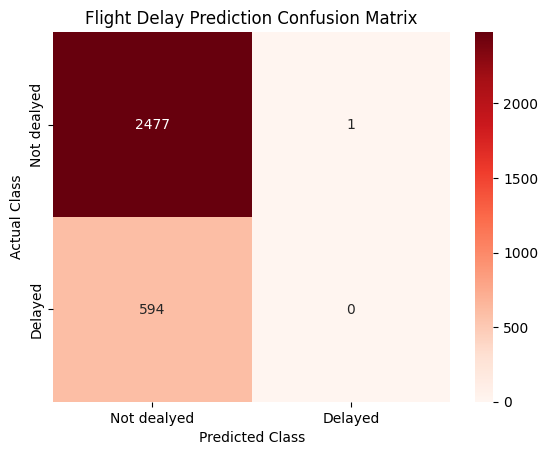

In [ ]:
y_predict = forest_best_est.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_predict)
label_name = ['Not dealyed', 'Delayed']
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_name, yticklabels=label_name)
#Plotting the predicted and the actualvalues
plt.title('Flight Delay Prediction Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Show plot
plt.show()

In [ ]:
#Accuracy checking
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("Classification report: ", classification_report(y_test, y_predict))

#RESUlT : Accuracy rate of 82%


Accuracy score: 0.8063151041666666
Classification report:                precision    recall  f1-score   support

           0       0.81      1.00      0.89      2478
           1       0.00      0.00      0.00       594

    accuracy                           0.81      3072
   macro avg       0.40      0.50      0.45      3072
weighted avg       0.65      0.81      0.72      3072

